In [40]:
from PIL import Image
from ultralytics import YOLO

# Работа с моделью
Данные функции позволяют инициализировать и использовать модели

In [41]:
def load_model(path_to_model):
    return YOLO(path_to_model)

nano = load_model('Models/Nano/Nano_final.pt')
small = load_model('Models/Small/Small_final.pt')

### Описание аргументов
`model` - какую модель использовать для предсказания

`path_to_images` - путь до картинки в формате строки, либо список из путей для картинок, если необходимо получить несколько предсказаний

`show_images` - показывать ли размеченные картинки

`save_images` - сохранять ли размеченные картинки

`return_marks_dict` - возвращать ли координаты повреждений в формате словаря, где ключ - путь до картинки, а значение по ключу - класс повреждения и его координаты

## Пример возращаемых данных
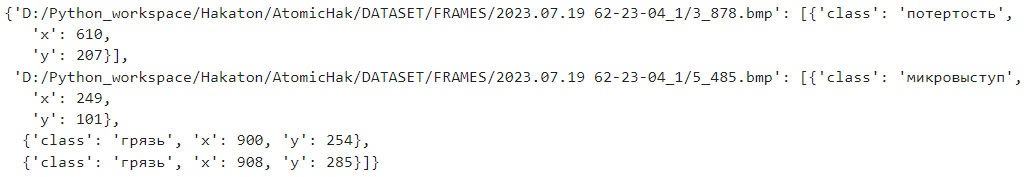

## Пример разметки
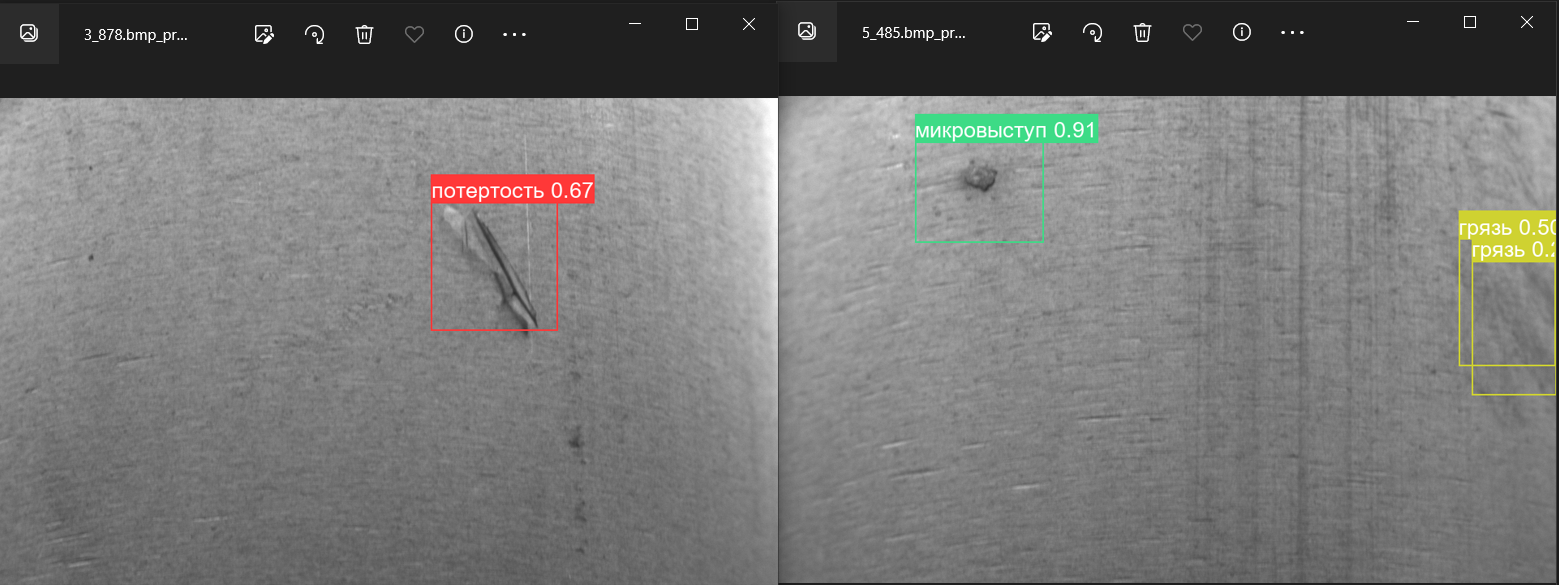

In [42]:
def get_prediction(model,
                   path_to_images='example.bmp',
                   show_images=False,
                   save_images=False,
                   return_marks_dict=True,
                   ):
    results = model(path_to_images)

    def process_photo(image, result):
        im_array = result.plot()
        im = Image.fromarray(im_array[..., ::-1])
        if show_images:
            im.show()
        if save_images:
            im.save(f'{image}_processed.bmp')

        ans = [{'class': result.names[int(class_)],
                'x': int(xywh[0]),
                'y': int(xywh[1])}
                for class_, xywh in zip(result.boxes.cls, result.boxes.xywh)]
        
        return ans
        

    if isinstance(path_to_images, str):
        result = process_photo(path_to_images, results[0])
        if len(result) == 0:
            return 'Нет дефектов'
        ans = "На фото обнаружены следующие дефекты:\n"
        for mark in result:
            ans += f"{mark['class']} по координатам \n x: {mark['x']}, y: {mark['y']}\n"
        return ans

    marks_dict = {image: process_photo(image, r) for image, r in zip(path_to_images, results)}

    return marks_dict